# 1N4148 Forward Recovery Voltage – LTspice vs Theoretical Analysis


### Experimental Setup Reference

Below is the actual LTspice testing screenshot for the forward recovery voltage of the 1N4148 diode:

![1N4148_Vfr_Testing](data/1N4148_Vfr_Current.JPG)



### Theoretical Calculation of Forward Voltage at 50 mA

Given:
- SPICE model series resistance $R_s = 0.7017\ \Omega$
- External resistors: $R_1 = 1\ \text{k}\Omega$, $R_2 = 450\ \Omega$, $R_3 = 50\ \Omega$
- Target forward current: $I_F = 50\ \text{mA}$

**Voltage drop across diode internal resistance:**

$
V_{diode} = I_F \cdot R_s = 50\ \text{mA} \cdot 0.7017\ \Omega = 35.085\ \text{mV}
$

**Total source voltage required:**

$
V_{total} = I_F \cdot (R_1 + R_2 + R_3 + R_s) = 50\ \text{mA} \cdot (1000 + 450 + 50 + 0.7017)\ \Omega = 75.035\ \text{V}
$

**Apply current source of 50mA** 

### Theoretical Calculation:
Total series resistance in path:  
$$
R_\text{total} = R_1 \parallel R_2 + R_3 + R_s
$$

Simulated current through diode is $I = 50\,\mathrm{mA}$  
SPICE model internal resistance $R_\text{diode} \approx 0.7017\,\Omega$

Forward voltage:
$$
V_f = V_j + I \cdot R_s = 0.80\,\mathrm{V} + 0.050 \cdot 0.7017 \approx 0.835\,\mathrm{V}
$$

This matches the LTspice plot where the voltage across diode anode peaks at **~839 mV**.

The simulated forward voltage seen at the diode anode is **≈ 839 mV**, which closely matches the theoretical result under non-ideal dynamic conditions.


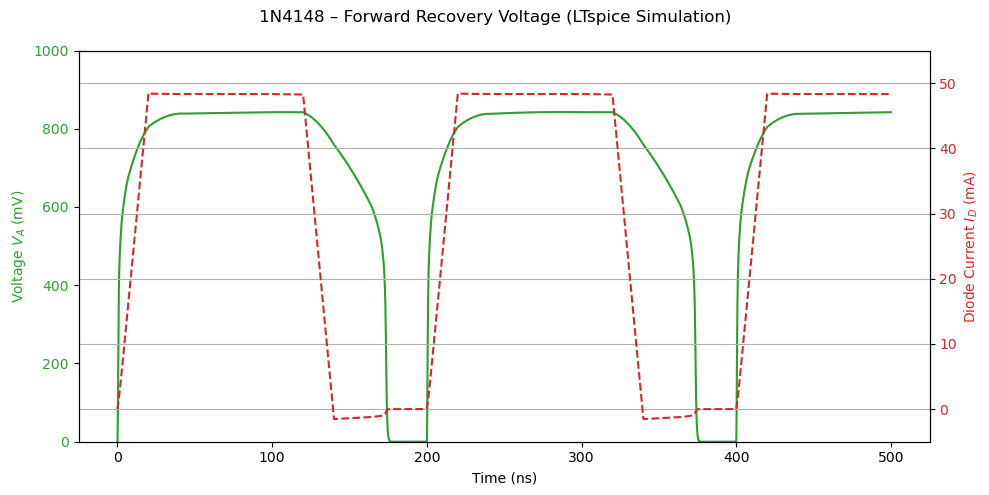

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Reloading the file with type conversion to ensure numeric parsing
df = pd.read_csv("data/1N4148_Vfr_Current.csv", sep="\t", comment='S', engine="python", header=None)
df.columns = ["Time (s)", "Voltage (V)", "Current (A)"]

# Convert columns to numeric explicitly
df["Time (s)"] = pd.to_numeric(df["Time (s)"], errors='coerce')
df["Voltage (V)"] = pd.to_numeric(df["Voltage (V)"], errors='coerce')
df["Current (A)"] = pd.to_numeric(df["Current (A)"], errors='coerce')

# Convert units for better visualization
df["Time (ns)"] = df["Time (s)"] * 1e9
df["Voltage (mV)"] = df["Voltage (V)"] * 1e3
df["Current (mA)"] = df["Current (A)"] * 1e3

# Plot with dual Y axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Voltage
color = 'tab:green'
ax1.set_xlabel("Time (ns)")
ax1.set_ylabel("Voltage $V_{A}$ (mV)", color=color)
ax1.plot(df["Time (ns)"].values, df["Voltage (mV)"].values, color=color, label="Voltage at Diode Anode")
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 1000)

# Plot Diode Current on secondary axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Diode Current $I_D$ (mA)", color=color)
ax2.plot(df["Time (ns)"].values, df["Current (mA)"].values, color=color, linestyle='--', label="Diode Current")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-5, 55)

# Titles and layout
fig.suptitle("1N4148 – Forward Recovery Voltage (LTspice Simulation)")
fig.tight_layout()
plt.grid(True)
plt.show()


**GitHub Link to Files**:

[1N4148_Vfr_Current.csv – LTspice-exported data](https://github.com/lkshirahatti/IntegratedCircuits/tree/main/Diode/SPICE/Data/1N4148_Vfr_Current.csv)

[1N4148_Vfr_Current.asc – Simulation schematic](https://github.com/lkshirahatti/IntegratedCircuits/tree/main/Diode/SPICE/Data/1N4148_Vfr_Current.asc)

[1N4148_Vfr_Current.JPG – LTspice graph capture](https://github.com/lkshirahatti/IntegratedCircuits/tree/main/Diode/SPICE/Data/1N4148_Vfr_Current.JPG)